In [30]:
import numpy as np
from facenet_models import FacenetModel
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import text
import skimage.io as io
from PIL import Image
import cv2 as cv

In [2]:
import torch
if (torch.cuda.is_available()):
	print("Using GPU")
	device = torch.device("cuda")

Using GPU


In [37]:
def find_eyes(image_data, *, box_threshold=0.97, prop_const=0.2):
    """
    Displays an image with boxes around people's faces and labels them with names.
    Parameters
    ----------
    image_data : numpy.ndarray, shape-(R, C, 3) (RGB is the last dimension)
        Pixel information for the image.
    """
    model = FacenetModel()
    boxes, probabilities, landmarks = model.detect(image_data)
    face_detected = True

    fig, ax = plt.subplots()
    ax.imshow(image_data)
    if (boxes is None):
        face_detected = False
        x = image_data.shape[1] // 2
        y = image_data.shape[0] // 2
        ax.text(x, y,
                "GIMME A FACE",
                size=20,
                va="center",
                ha="center",
                bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
        plt.show()
        return [], [], face_detected
    descriptors = model.compute_descriptors(image_data, boxes)
    
    eye_coords = []
    eye_boxes = []
    
    for box, prob, landmark in zip(boxes, probabilities, landmarks):
        if prob<box_threshold:
            continue
        eye_coords.append(landmark[0])
        eye_coords.append(landmark[1])
        left = box[0]
        top = box[1]
        right = box[2]
        bottom = box[3]
        radius = (((top - bottom) + (right - left)) / 2) * prop_const
        (eye_coords[0, 0], eye_coords[0, 1])
        
        ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))
        for i in range(2):
            ax.plot(landmark[i, 0], landmark[i, 1], "+", color="blue")
    return eye_coords, eye_boxes, face_detected

Filepath: alan3.png


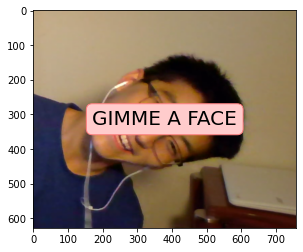

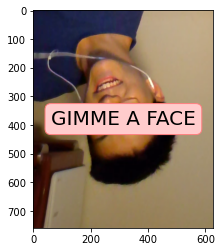

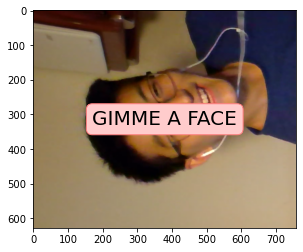

[array([285.81277, 392.1966 ], dtype=float32), array([394.13025, 357.4231 ], dtype=float32)]
[]


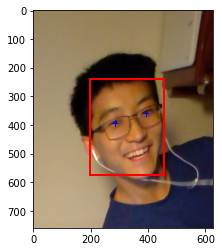

In [39]:
filepath = input("Filepath: ")
# pic = np.array(Image.open(filepath))[:,:,:3]
# shape-(Height, Width, Color)
pic = io.imread(str(filepath))
if pic.shape[-1] == 4:
    # Image is RGBA, where A is alpha -> transparency
    # Must make image RGB.
    pic = pic[..., :-1]  # png -> RGB
i = 0
face_detected = False
while (not face_detected and i < 4):
    eye_coords, eye_boxes, face_detected = find_eyes(pic)
    pic = cv.rotate(pic, cv.ROTATE_90_CLOCKWISE)
    i += 1
print(eye_coords)
print(eye_boxes)